In [362]:
import networkx as nx
import scipy as spy
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import expm, sinm, cosm
import seaborn as sns

plt.rcParams["figure.figsize"] = [12,9]

# Introdução

$$\newcommand{\braket}[2]{\left|{#2}\right\rangle}$$

A  caminhada  quântica  é  a  contrapartida  quântica  às caminhadas  aleatórias  clássica,  na  qual amplitudes  de  probabilidade  se  interferem  mudando  drasticamente  o  perfil  de  distribuição  de probabilidades. Neste trabalho, iremos explorar caminahdas quânticas em tempo contínuo (CTQW), especificamente em grafos ciclo. Um grafo ciclo (ou grafo Cn) é um grafo que consiste de apenas um ciclo: vértices conectados em uma corrente fechada.
    Para a CTQW, podemos descrever o estado do sistema no instante t com a equação: $$\braket{1}{\psi(t)} = exp(i\gamma H t)\braket{1}{\psi_0}$$

# Criando Grafo Cn
Abaixo, criando um grafo ciclo G e sua visualização

/home/breno/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


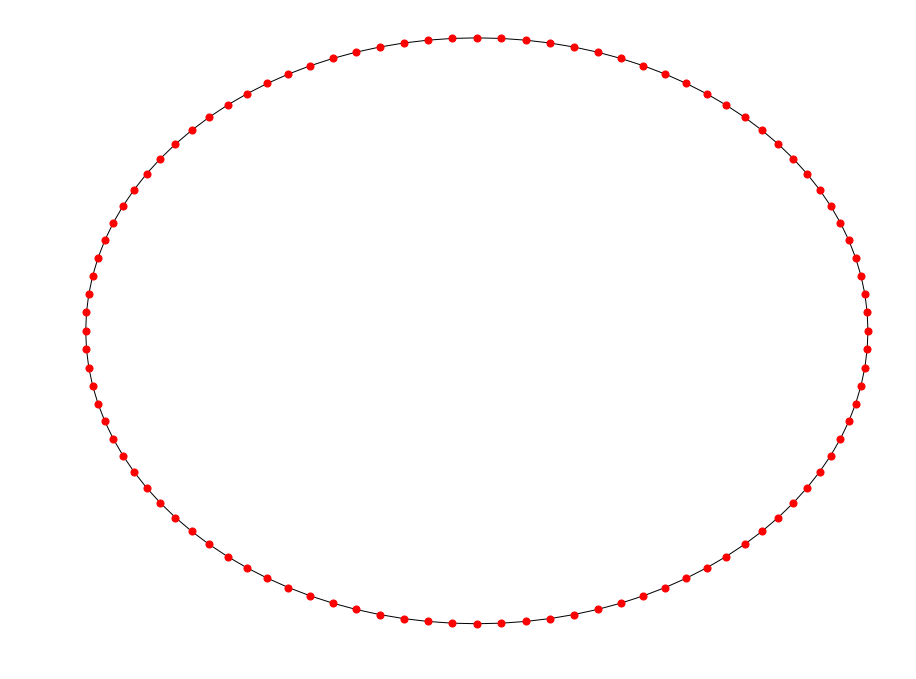

In [363]:
Cn = 100
def create_graph(Cn,plot=False):  
    G = nx.cycle_graph(Cn)
    if plot:
        nx.draw_kamada_kawai(G, node_size=50)
        plt.show()
    return G
        
G = create_graph(Cn,plot=True)

# Estado Inicial Com Entradas Iguais

In [364]:
adj = nx.to_scipy_sparse_matrix(G)
graph_size = Cn
initial_state = np.zeros(graph_size ,dtype=complex)
initial_state[0] = 1j/math.sqrt(2)
initial_state[1] = 1j/math.sqrt(2)

norm = np.linalg.norm(initial_state)
initial_state /= norm


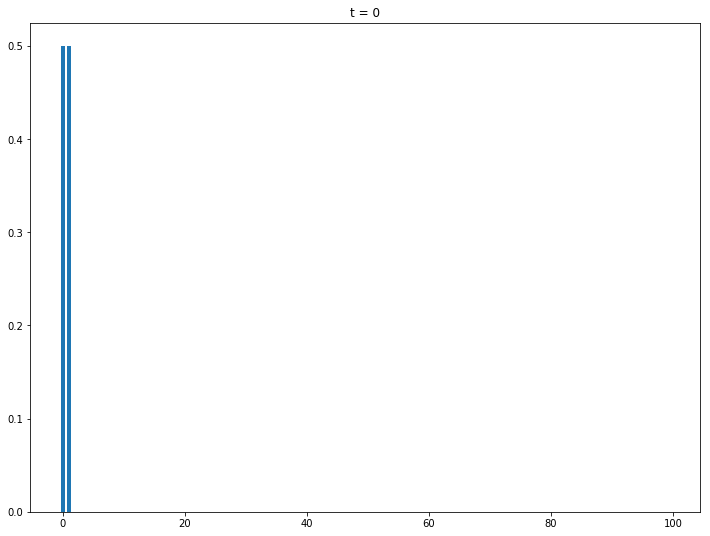

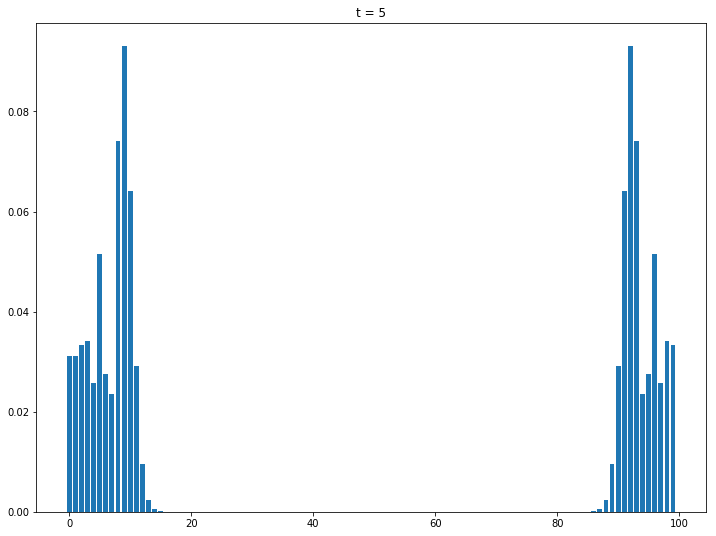

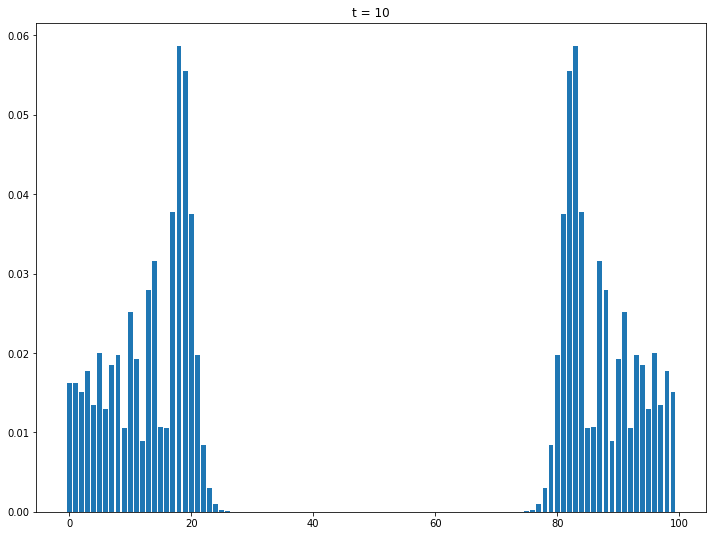

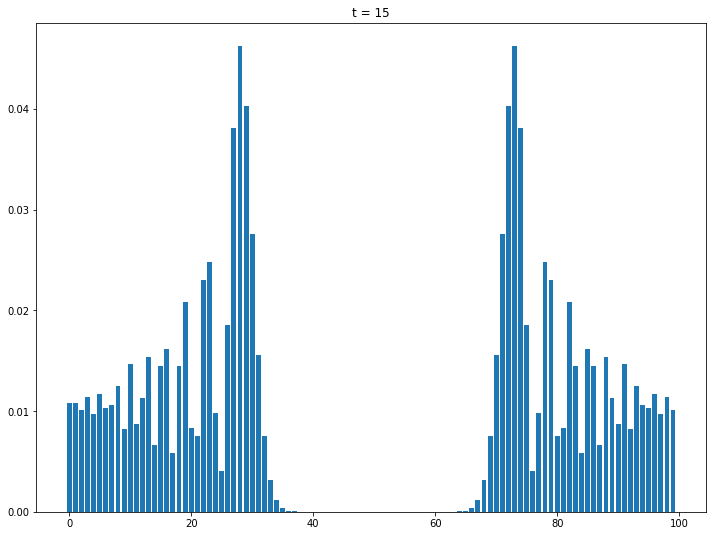

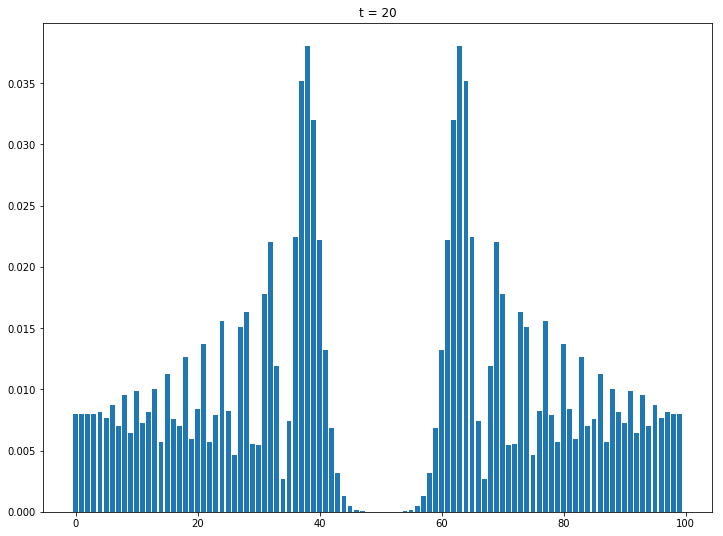

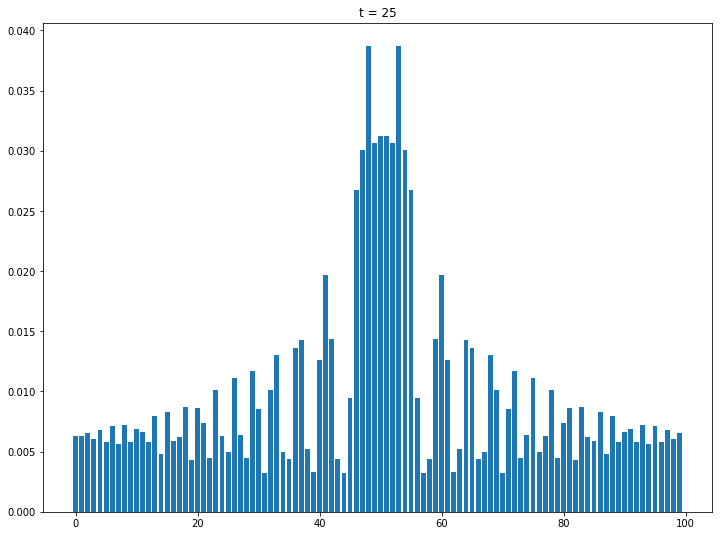

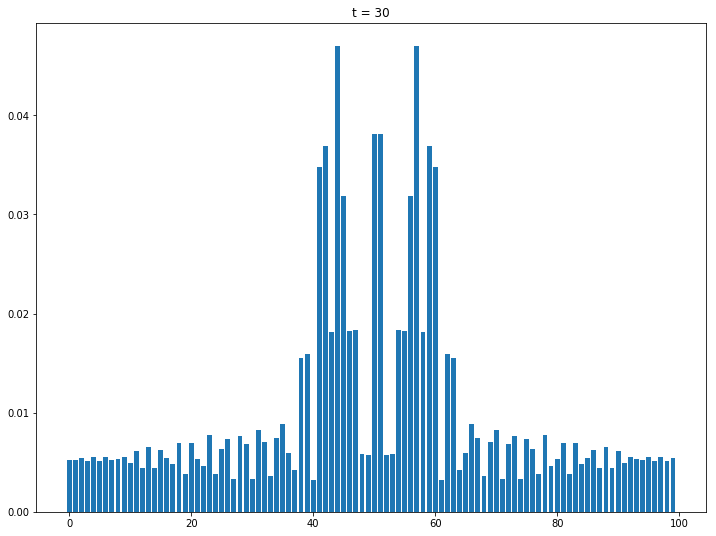

In [365]:
def plot_dist(adj,gamma,t,initial_state):
    adjnew = expm(1j*gamma*adj*t)
    final_state = adjnew.dot(initial_state)
    for i in range(len(initial_state)):
        final_state[i] = pow(abs(final_state[i]),2)
    plt.bar([x for x in range(0,Cn)],final_state)
    plt.title("t = "+str(t))
    plt.show()

gamma = 1
for t in range(0,35,5):
    plot_dist(adj,gamma,t,initial_state)

Os gráficos acima representam a probabilidade para cada vértice do grafo para um t arbitrário. É possível observar que existe um comportamento de onda, que pode ser explicado pelo walker explorando o grafo: no instante 0, os vértices 0 e 1 concentram toda a probabilidade da distribuição. Conforme o tempo avança, é possível observar que a probabilidade dos vértices mais próximos dos vértices 0 e 99 aumenta, até o momento t = 25, em que todos os vértices têm uma probabilidade associada

## Desvio Padrão
Segue uma breve análise do desvio padrão conforme o tempo avança. Para efeitos de comparação, iremos variar o parametro gamma

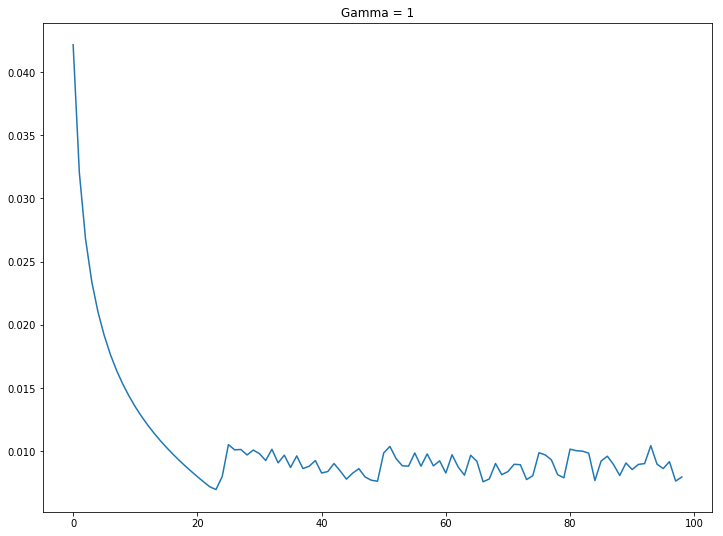

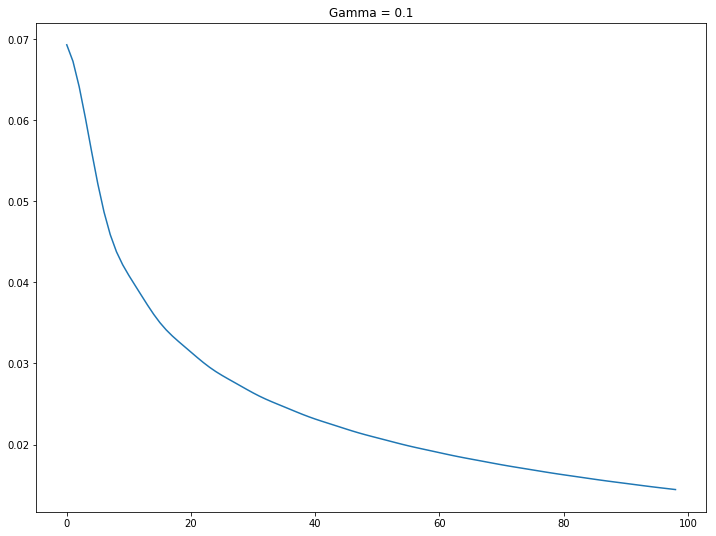

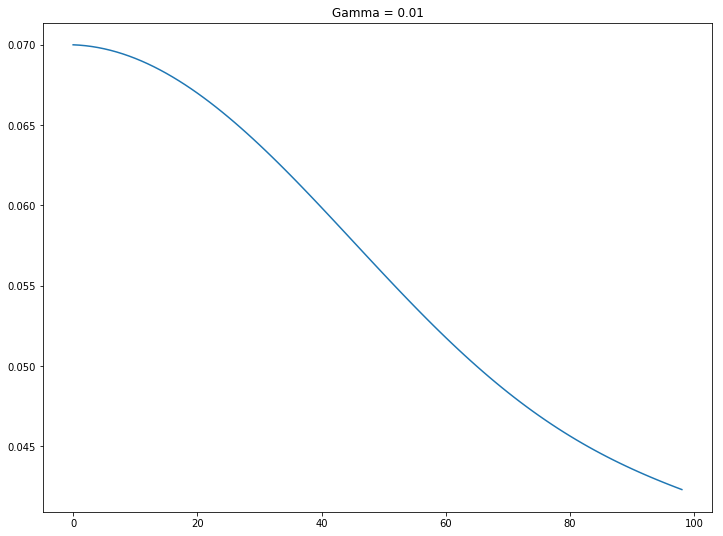

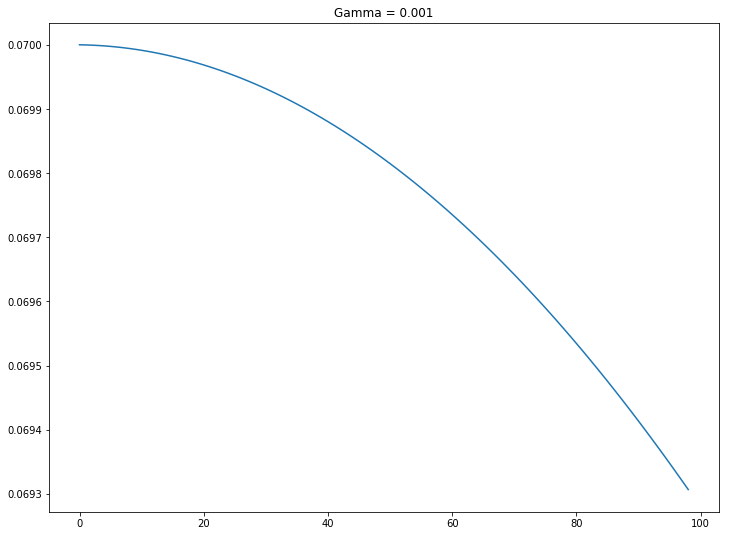

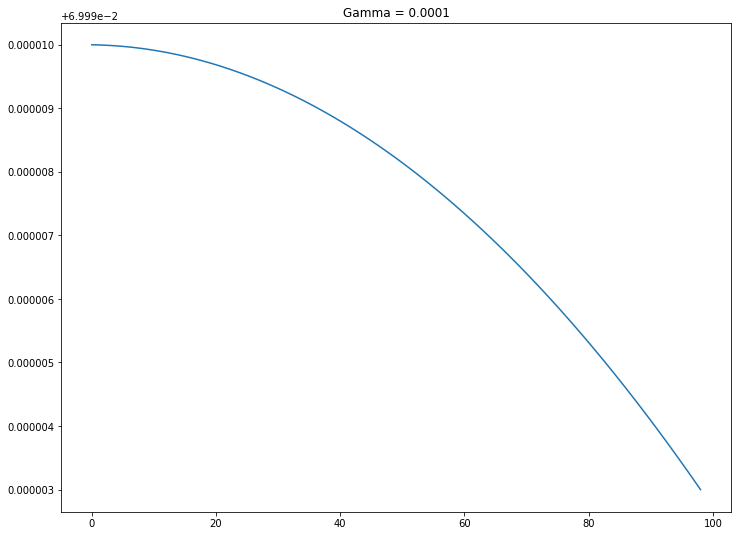

In [ ]:
gamma = 1
def plot_dist_gamma(gamma):
    data_points = []
    for t in range(1,100):
        adjnew = expm(1j*gamma*adj*t)
        final_state = adjnew.dot(initial_state)
        for i in range(len(initial_state)):
            final_state[i] = pow(abs(final_state[i]),2)
        std = np.std(final_state)
        data_points.append(std)
    plt.plot(data_points)
    plt.title("Gamma = "+str(gamma))
    plt.show()
        
for i in range(0,5):
    gamma = 1*pow(10,-i)
    plot_dist_gamma(gamma)

É possível observar que, conforme diminuímos o gamma o gráfico aproxima-se a uma reta

# Estado Inicial Com Entradas Diferentes
Iremos repetir o processo anterior, agora com entradas diferentes para o vetor inicial.

In [ ]:
adj = nx.to_scipy_sparse_matrix(G)
graph_size = Cn
initial_state = np.zeros(graph_size ,dtype=complex)
initial_state[0] = 1j/math.sqrt(2)
initial_state[1] = -2.1j/math.sqrt(2)

norm = np.linalg.norm(initial_state)
initial_state /= norm

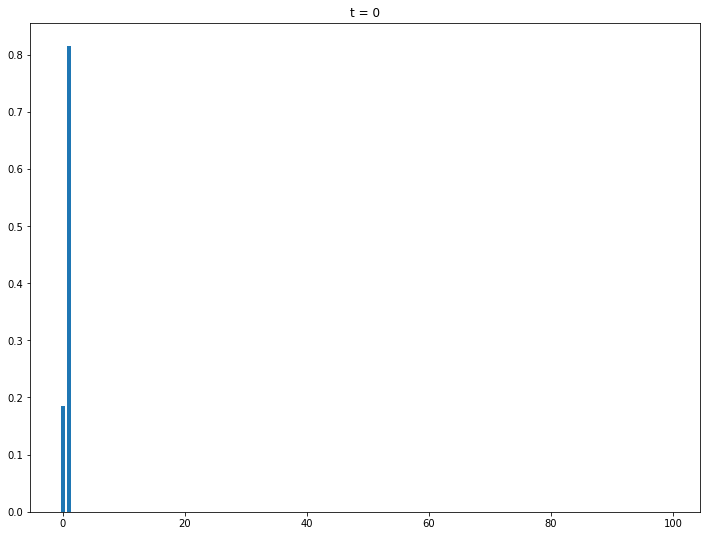

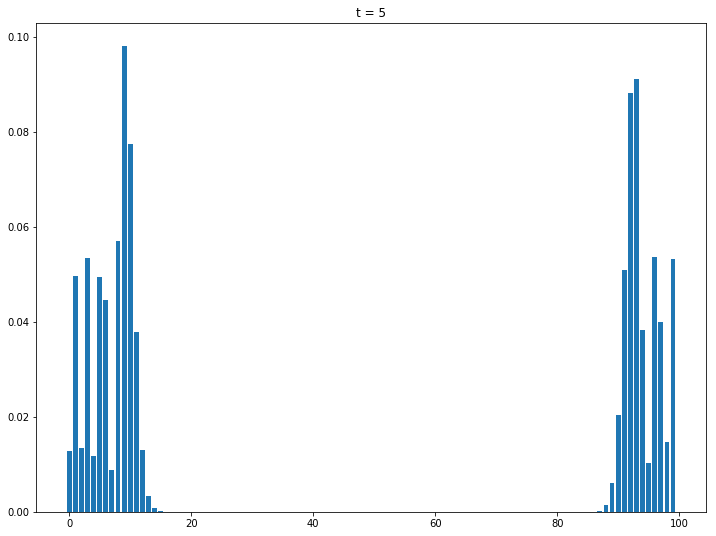

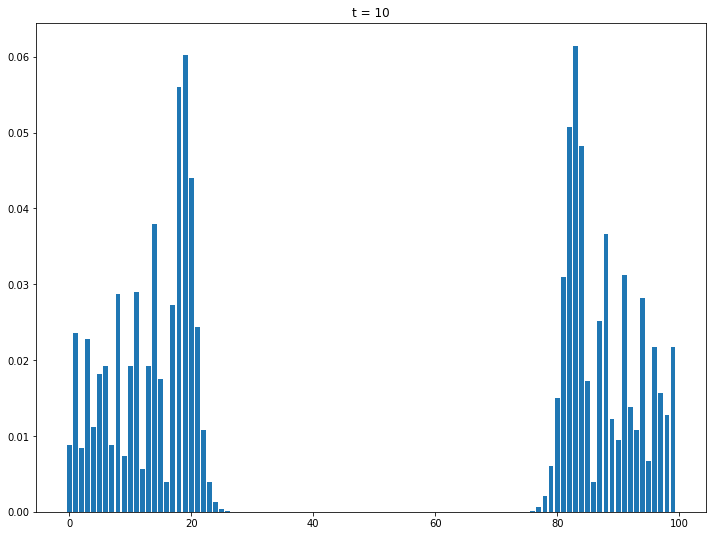

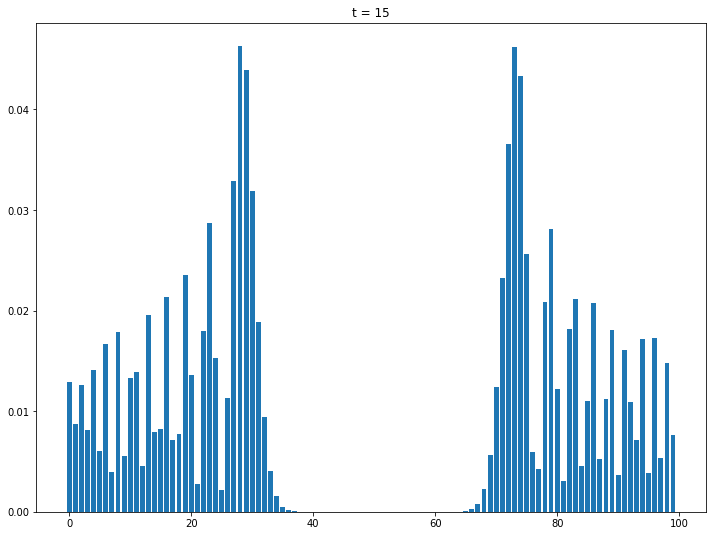

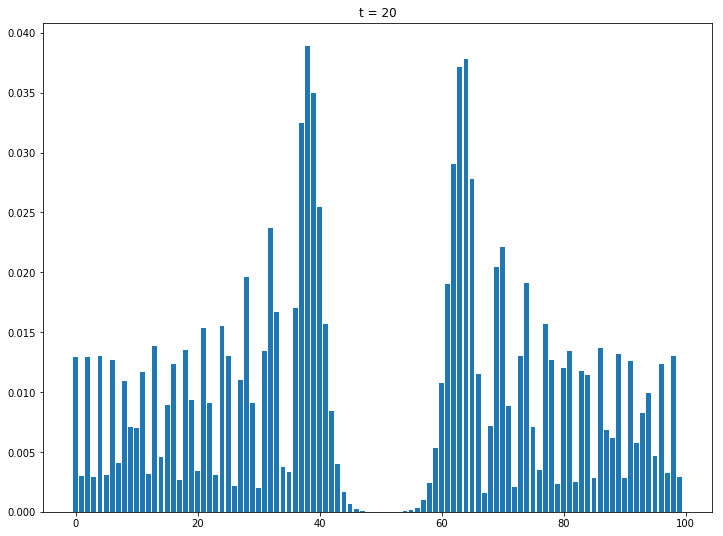

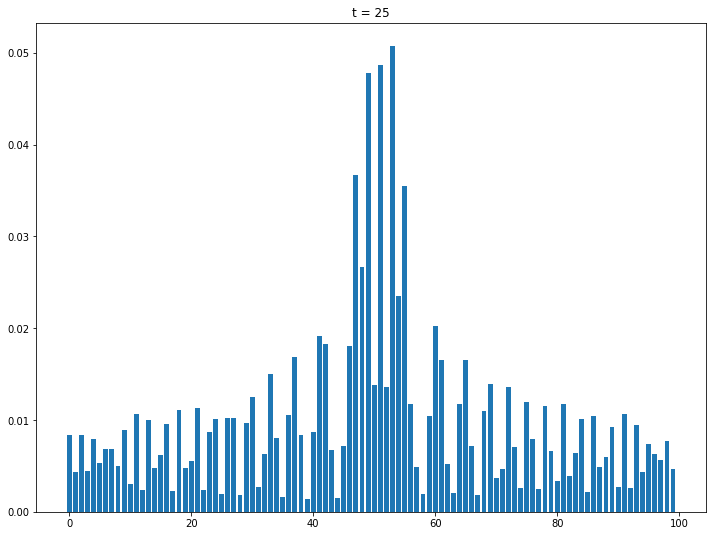

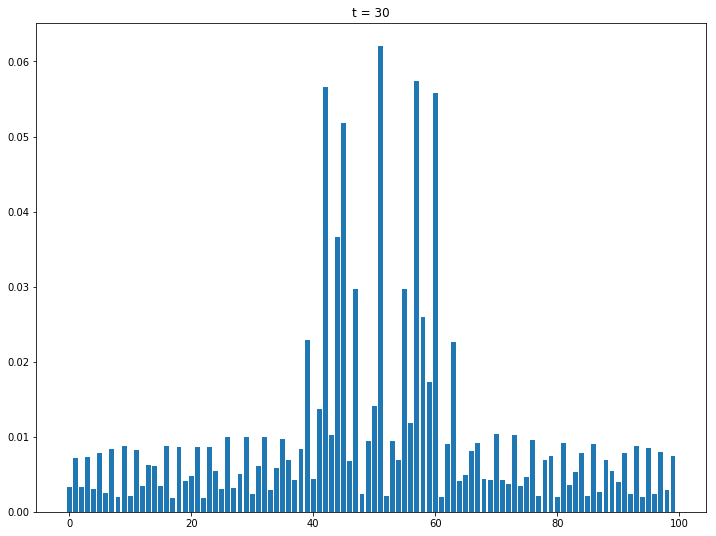

In [ ]:
gamma = 1
for t in range(0,35,5):
    plot_dist(adj,gamma,t,initial_state)

## Desvio Padrão

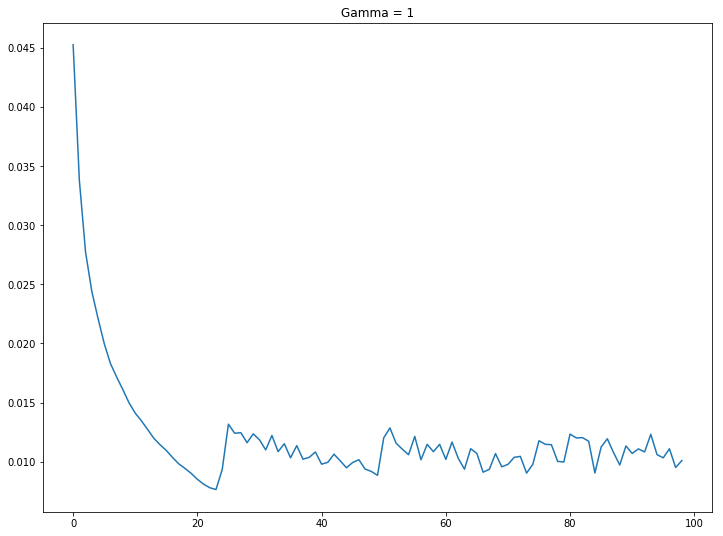

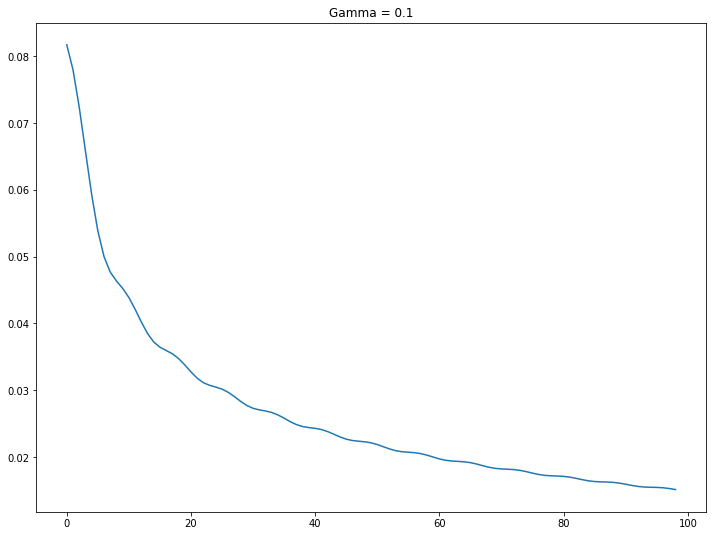

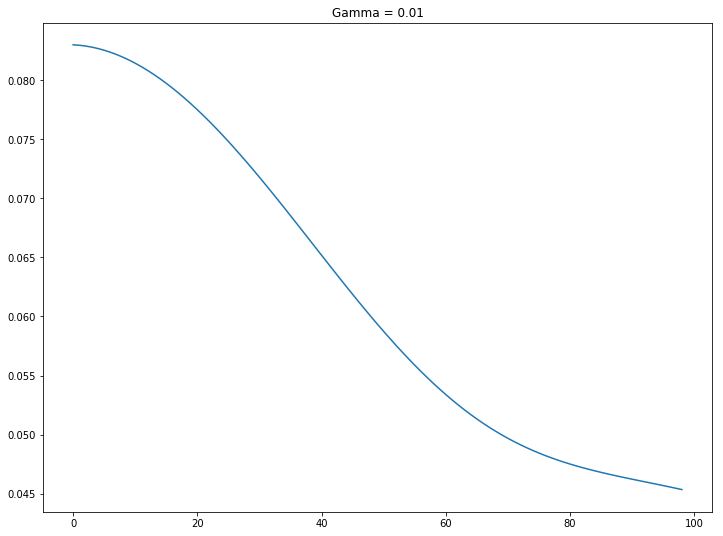

In [ ]:
for i in range(0,5):
    gamma = 1*pow(10,-i)
    plot_dist_gamma(gamma)

Analogamente ao experimento anterior, conforme diminuímos gamma, o gráfico aproxima-se a uma reta.